In [1]:
!pip install pandas numpy matplotlib seaborn nltk wordcloud

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/twitter_training.csv")

# Preview the dataset
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
# Define the column names
column_names = ['ID', 'Topic', 'Sentiment', 'Tweet_Text']

# Load the dataset with the column names
df = pd.read_csv('/content/twitter_training.csv', header=None, names=column_names)

# Check the dataset with column names assigned
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                          Tweet_Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already done
nltk.download('stopwords')
nltk.download('punkt')

# Define the function to clean the text
def clean_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Remove URLs and non-alphanumeric characters
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)
        # Tokenize and remove stopwords
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(tokens)
    else:
        # If it's not a string, return an empty string or handle as needed
        return ''

# Apply the cleaning function to the 'Tweet_Text' column
df['cleaned_text'] = df['Tweet_Text'].apply(clean_text)

# Check the cleaned data
print(df[['Tweet_Text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                          Tweet_Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                      cleaned_text  
0    im getting borderlands murder  
1              coming borders kill  
2      im getting borderlands kill  
3     im coming borderlands murder  
4  im getting borderlands 2 murder  


In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER compound score
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the cleaned tweet text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Check the sentiment analysis results
print(df[['Tweet_Text', 'cleaned_text', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                          Tweet_Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                      cleaned_text sentiment  
0    im getting borderlands murder  Negative  
1              coming borders kill  Negative  
2      im getting borderlands kill  Negative  
3     im coming borderlands murder  Negative  
4  im getting borderlands 2 murder  Negative  


<ipython-input-15-cc03f1ddfe4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


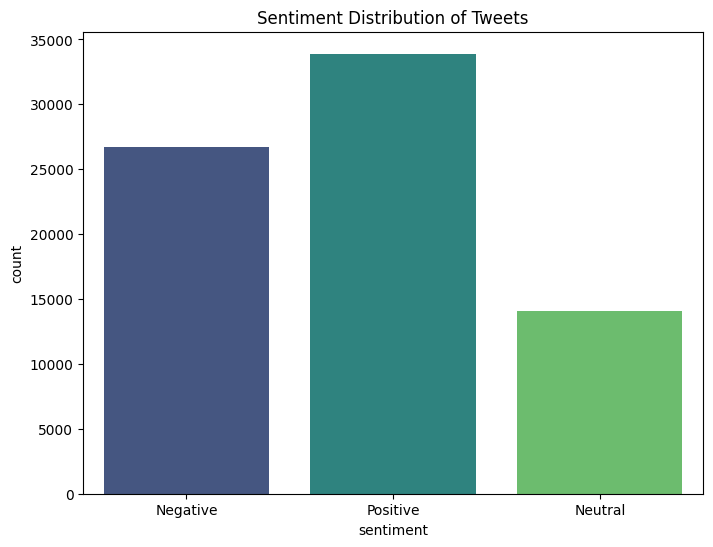

In [15]:
#Visulaizse
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution of Tweets')
plt.show()


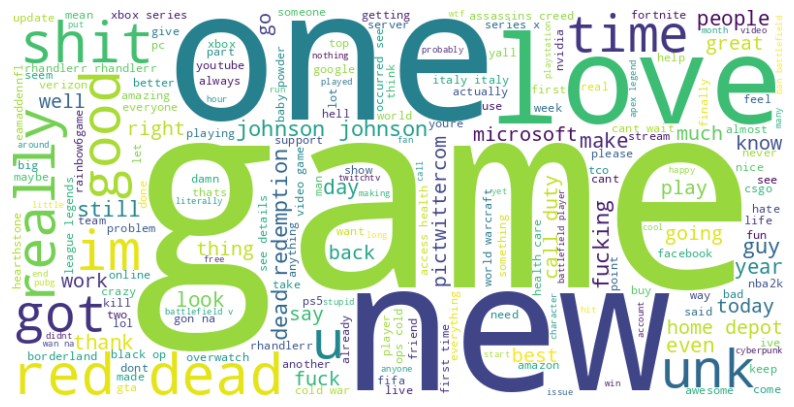

In [16]:
from wordcloud import WordCloud

# Join all cleaned text
all_text = ' '.join(df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()